## Support Vector Machine (SVM)

`Support Vector Machine (SVM)` is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. 
SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_1.png">

**Support Vectors**
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

**Hyperplane**
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

**Margin**
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

**How the SVM actually searches for this line or decsion bundry line?** The line is searched through the `maximum margin`.
The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.


<img src="https://static.packt-cdn.com/products/9781783555130/graphics/3547_03_07.jpg">


### Kernel trick
Some problems can’t be solved using linear hyperplane, as shown in the figure below (left-hand side).

In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space as shown on the right. The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2=y^2). 

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index_bnr4rx.png">


### SVM Kernels
The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

`Linear Kernel` A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

`Polynomial Kernel` A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.

`Radial Basis Function Kernel` The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.

### What's so special about SVM and why?

Let 's learn it with an example. Imagine you're trying to teach a machine how to distinguish between apples and oranges!
We are going to give the machine some test data.

So what predominately Machine Learning algorithms would do is they would look at the most stock standard common type of apples and the most stock standard common type of oranges A machine would try to learn from the apples that are very like apples so it would know what an apple is. And it also tried to learn from oranges so it would know what an orange actually is and that's how most of the machine learning algorithms work and then based on that it would be able to come up with some predictions and classifying for new data elements and variables that you would get it.
In the case of support vector machine. It's a bit different. Instead of looking at the most stocks standard apples and stocks and oranges what support vector machines do is it actually looks at the apples that are very much like an orange. An apple that is very easy to take as an orange mistaken. And it would look at oranges which are not stock standard oranges which are more like apples than anything else!
You can think of SVM more extreme type of algorithm, a very rebellious and very risky type of algorithm because it looks at a very extreme case which is very close to the boundary and it uses that to construct its analysis. And that in itself makes the support vector machine algorithms very special very different to most of the other machine learning algorithms.

### Pros and Cons associated with SVM
**Pros:**
- It works really well with a clear margin of separation
- It is effective in high dimensional spaces.
- It is effective in cases where the number of dimensions is greater than the number of samples.
- It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

**Cons:**
- It doesn’t perform well when we have large data set because the required training time is higher
- It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
- SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVC method of Python scikit-learn library.

Refrences and more info: [analyticsvidhya](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/) and [datacamp](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python).

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', degree=5 , random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [7]:
Y_test = pd.DataFrame(y_test,columns={'Y_test_actual'})
Y_test['Y_perdict'] = pd.DataFrame(y_pred,columns={'Y_perdict'})
Y_test.head(50)

,Y_test_actual,Y_perdict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [9]:
pd.DataFrame(cm,index={'True', 'False'},columns={'True', 'False'})

,True,False
True,67,1
False,14,18


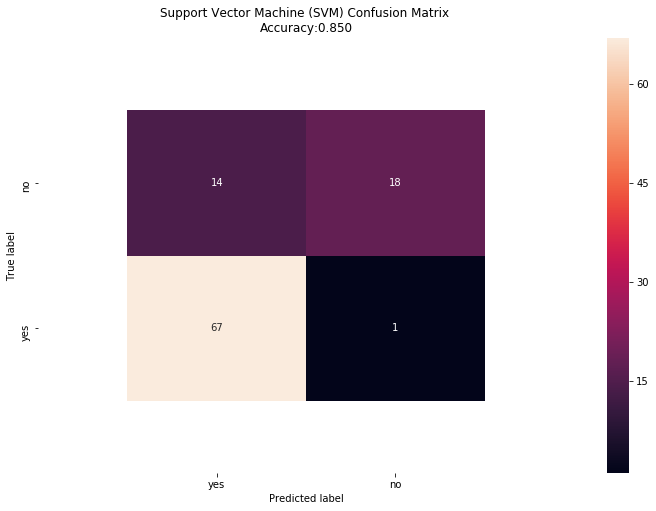

,yes,no
yes,67,1
no,14,18


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['yes','no'], 
                     columns = ['yes','no'])

plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True)
plt.title('Support Vector Machine (SVM) Confusion Matrix \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)

plt.show()
cm_df

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


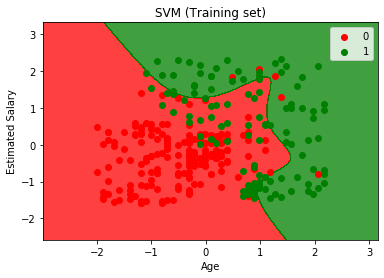

In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


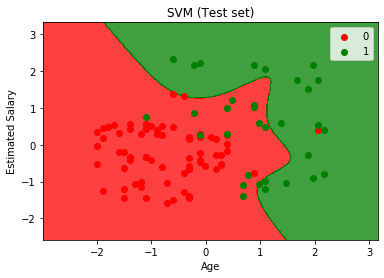

In [12]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()